In [45]:
import warnings
import numpy
import gensim
import pandas as pd
import re
from gensim import corpora, models
from gensim.models import Word2Vec 
import nltk
from nltk.tokenize import sent_tokenize ,word_tokenize
from nltk.stem import WordNetLemmatizer    #links words with similar meaning to one word
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import sklearn
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy
from scipy import spatial
from sklearn.manifold import TSNE
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
keywords_list="""virtual banks, south korea, k bank, # ,kakao bank, toss, funding in virtual banks, banking population, digital banking users, smartphone users,  digital loans, online deposits, digital only banks, virtual bank license, FSC south korea, virtual bank valuation
​"""
keywords_list= keywords_list.lower()

In [0]:
contents="""     
South Korean FinTech startup Viva Republica, creator of the financial services platform Toss, was granted preliminary approval for a digital banking license from the Financial Services Commission of Korea, a Monday (Dec. 16) press release indicated.

“Toss has already become the leading financial super app in Korea. With a digital bank license, we will be able to broaden our product offering … so that we can accelerate our mission to innovate the financial industry,” said SG Lee, CEO of Viva Republica.

Since its launch in 2015, Toss has become the only FinTech unicorn in Korea. The bank is expected to start operating during the first six months of 2021 after it gets the final nod for a license.

A digital banking license will enable Toss to offer an extensive menu of financial services to individuals and businesses. Calling itself a “challenger bank for the underbanked,” Toss will even offer banking products to people with thin files and mid-range credit scores.

Viva Republic, which was founded in 2013, first launched Toss as a peer-to-peer (P2P) money transfer service, Deal Street Asia reported. Toss Bank will become South Korea’s third digital bank operating without a physical location. In 2017, two internet-only banks – K Bank and Kakao Bank – officially launched.

Valued at $2.2 billion following August’s $64 million funding round, the Toss app has been downloaded more than 30 million times and has over 16 million registered users – over 20 percent of South Korea’s population.

Last year, Kakao Bank and K Bank reported net losses of 21.2 billion won ($18 million) and 79.7 billion won ($68 million) respectively, according to data from the Korea Federation of Banks, Deal Street Asia reported.

On Oct. 31, South Korea started a pilot-testing program for open banking. The South Korean government said it would run the pilot phase and then assess the system and its performance, making adjustments as necessary. The system will be released to FinTech firms by Wednesday (Dec. 18)."""

contents = contents.lower()


In [78]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(keywords_list)
Filtered_keywords = []

for w in words:
    if w not in stopWords:
        Filtered_keywords.append(w)

print(Filtered_keywords)

['virtual', 'banks', ',', 'south', 'korea', ',', 'k', 'bank', ',', '#', ',', 'kakao', 'bank', ',', 'toss', ',', 'funding', 'virtual', 'banks', ',', 'banking', 'population', ',', 'digital', 'banking', 'users', ',', 'smartphone', 'users', ',', 'digital', 'loans', ',', 'online', 'deposits', ',', 'digital', 'banks', ',', 'virtual', 'bank', 'license', ',', 'fsc', 'south', 'korea', ',', 'virtual', 'bank', 'valuation', '\u200b']


In [79]:
words = word_tokenize(contents)
Filtered_content= []

for w in words:
    if w not in stopWords:
        Filtered_content.append(w)

print(Filtered_content)

['south', 'korean', 'fintech', 'startup', 'viva', 'republica', ',', 'creator', 'financial', 'services', 'platform', 'toss', ',', 'granted', 'preliminary', 'approval', 'digital', 'banking', 'license', 'financial', 'services', 'commission', 'korea', ',', 'monday', '(', 'dec.', '16', ')', 'press', 'release', 'indicated', '.', '“', 'toss', 'already', 'become', 'leading', 'financial', 'super', 'app', 'korea', '.', 'digital', 'bank', 'license', ',', 'able', 'broaden', 'product', 'offering', '…', 'accelerate', 'mission', 'innovate', 'financial', 'industry', ',', '”', 'said', 'sg', 'lee', ',', 'ceo', 'viva', 'republica', '.', 'since', 'launch', '2015', ',', 'toss', 'become', 'fintech', 'unicorn', 'korea', '.', 'bank', 'expected', 'start', 'operating', 'first', 'six', 'months', '2021', 'gets', 'final', 'nod', 'license', '.', 'digital', 'banking', 'license', 'enable', 'toss', 'offer', 'extensive', 'menu', 'financial', 'services', 'individuals', 'businesses', '.', 'calling', '“', 'challenger', 'b

In [80]:
lemmatizer = WordNetLemmatizer() 

lemmatized_output_k = ' '.join([lemmatizer.lemmatize(w) for w in Filtered_keywords ]) 
print(lemmatized_output_k)

virtual bank , south korea , k bank , # , kakao bank , toss , funding virtual bank , banking population , digital banking user , smartphone user , digital loan , online deposit , digital bank , virtual bank license , fsc south korea , virtual bank valuation ​


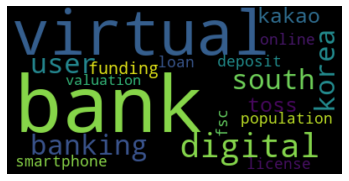

In [81]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmatized_output_k)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
lemmatized_output_c = ' '.join([lemmatizer.lemmatize(w) for w in Filtered_content]) 
print(lemmatized_output_c)

south korean fintech startup viva republica , creator financial service platform toss , granted preliminary approval digital banking license financial service commission korea , monday ( dec. 16 ) press release indicated . “ toss already become leading financial super app korea . digital bank license , able broaden product offering … accelerate mission innovate financial industry , ” said sg lee , ceo viva republica . since launch 2015 , toss become fintech unicorn korea . bank expected start operating first six month 2021 get final nod license . digital banking license enable toss offer extensive menu financial service individual business . calling “ challenger bank underbanked , ” toss even offer banking product people thin file mid-range credit score . viva republic , founded 2013 , first launched toss peer-to-peer ( p2p ) money transfer service , deal street asia reported . toss bank become south korea ’ third digital bank operating without physical location . 2017 , two internet-o

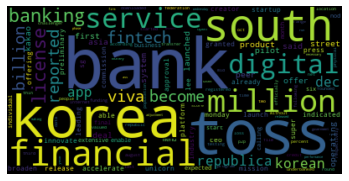

In [83]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmatized_output_c)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [85]:
similarity = word_vectors.wmdistance(lemmatized_output_k, lemmatized_output_c)
print("score between keywords and contents: {:.6f}".format(similarity))

score between keywords and contents: 1.339871
